In [1]:
import pandas as pd
import numpy as np
import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler


Bad key "text.kerning_factor" on line 4 in
D:\anaconda\envs\pytorch\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# read file
stock_path = "C:/Users/acer/Desktop/LAB/lab2_2.csv"
stock_df = pd.read_csv(stock_path)

In [3]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format="%Y/%m/%d")

In [4]:
stock_df = pd.DataFrame(stock_df[["Open","High","Low","Close","Change(%)","market_Change(%)","Low","K","D","SMA","EMA","K(%)","D(%)","SMA(%)","EMA(%)","RISE"]].values,columns = ["Open","High","Low","Close","Change(%)","market_Change(%)","Low","K","D","SMA","EMA","K(%)","D(%)","SMA(%)","EMA(%)","RISE"],index = stock_df["Date"].values)

In [5]:
stock_df

,Open,High,Low,Close,Change(%),market_Change(%),Low,K,D,SMA,EMA,K(%),D(%),SMA(%),EMA(%),RISE
2010-01-12,27.514700,28.830000,27.251699,27.567301,1.158100,-0.173601,27.251699,58.376016,52.792005,25.414129,25.414129,16.752032,5.584011,1.432282,1.432282,1.0
2010-01-13,27.251699,29.461300,27.251699,29.461300,6.870455,-1.357631,27.251699,72.250677,59.278229,25.977800,26.425921,23.767743,12.286375,2.217945,3.981222,1.0
2010-01-14,30.197800,31.513100,30.197800,31.513100,6.964391,1.139757,30.197800,81.500452,66.685637,27.060057,27.697716,12.802336,12.496000,4.166085,4.812679,1.0
2010-01-15,33.669998,33.669998,33.669998,33.669998,6.844449,0.807109,33.669998,87.666968,73.679414,28.405343,29.190787,7.566236,10.487681,4.971480,5.390591,1.0
2010-01-18,35.774399,35.984901,34.564400,35.984901,6.875269,-0.228187,34.564400,91.777978,79.712269,30.137700,30.889315,4.689350,8.187979,6.098702,5.818715,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,56.599998,57.400002,56.299999,57.000000,0.706717,0.265105,56.299999,81.904480,77.871076,55.357143,55.617953,0.879924,2.658650,1.174935,0.835216,1.0
2019-12-26,58.000000,59.200001,57.599998,58.299999,2.280700,-0.059294,57.599998,83.018279,79.586810,56.057142,56.288464,1.359875,2.203301,1.264515,1.205567,1.0
2019-12-27,58.599998,59.599998,58.400002,59.400002,1.886798,0.754770,58.400002,87.603605,82.259075,56.842857,57.066349,5.523272,3.357673,1.401631,1.381961,1.0
2019-12-30,61.799999,65.300003,61.799999,65.300003,9.932661,-0.316085,61.799999,91.735736,85.417962,58.442857,59.124762,4.716851,3.840169,2.814779,3.607053,1.0


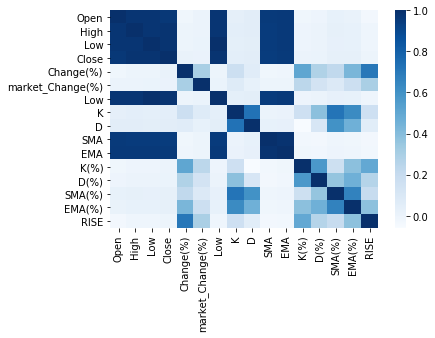

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = stock_df.corr(method="kendall")
sns.heatmap(corr,cmap="Blues")
plt.show()

In [7]:
scaler= MinMaxScaler(feature_range = (-1,1))
minmax_df = scaler.fit_transform(stock_df[["Change(%)","market_Change(%)","K(%)","D(%)","SMA(%)","EMA(%)"]])
minmax_df = pd.DataFrame(minmax_df,columns = ["Change(%)","market_Change(%)","K(%)","D(%)","SMA(%)","EMA(%)"],index = stock_df.index)
minmax_df["RISE"] = stock_df["RISE"].values

In [8]:
minmax_df

,Change(%),market_Change(%),K(%),D(%),SMA(%),EMA(%),RISE
2010-01-12,0.117873,0.129217,-0.619633,-0.354385,0.082550,0.140285,1.0
2010-01-13,0.690164,-0.088579,-0.566353,-0.209309,0.237017,0.639862,1.0
2010-01-14,0.699575,0.370801,-0.649628,-0.204772,0.620034,0.802823,1.0
2010-01-15,0.687559,0.309613,-0.689393,-0.248243,0.778381,0.916090,1.0
2010-01-18,0.690647,0.119176,-0.711241,-0.298021,1.000000,1.000000,1.0
...,...,...,...,...,...,...,...
2019-12-25,0.072651,0.209914,-0.740172,-0.417706,0.031954,0.023264,1.0
2019-12-26,0.230340,0.150243,-0.736527,-0.427562,0.049566,0.095850,1.0
2019-12-27,0.190877,0.299985,-0.704908,-0.402575,0.076524,0.130423,1.0
2019-12-30,0.996951,0.103008,-0.711033,-0.392131,0.354358,0.566528,1.0


In [9]:
#hy parameter
torch.manual_seed(1)
EPOCH = 200
BATCH_SIZE = 16
TIME_STEP = 7
INPUT_SIZE = 6
LR = 0.001

In [10]:
# declear training features data
features = []
for i in range(TIME_STEP,len(minmax_df)):
    x = minmax_df[i-TIME_STEP:i][["Change(%)","market_Change(%)","K(%)","D(%)","SMA(%)","EMA(%)"]].values
    features.append(x.tolist())
features = torch.FloatTensor(features)
print("size of feature: ",features.size())

# declear trainging labels data
labels = []
for i in range(TIME_STEP,len(minmax_df)):
    x = minmax_df[i:i+1]["RISE"]
    labels.append(x.tolist())
labels = torch.LongTensor(labels).view(-1)
print("size of label: ",labels.size())

size of feature:  torch.Size([2276, 7, 6])
size of label:  torch.Size([2276])


In [11]:
# random select 90% training set index and 10% testing set index 

x = np.linspace(0,2275,2276).tolist()
for i in range(0,2276):
    x[i] = int(x[i])

np.random.shuffle(x)
training, test = x[:2000], x[2000:]
test.sort()
training.sort()
train_features = features[training]
train_labels = labels[training]
test_features = features[test]
test_labels = labels[test]


In [12]:

#Mini-Batch

torch_dataset = Data.TensorDataset(train_features,train_labels)
train_loader = Data.DataLoader(
    dataset = torch_dataset,
    batch_size = BATCH_SIZE,
    num_workers = 2,
    shuffle=True,
)

In [13]:
class Encoder(torch.nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        
        self.lstm1 = torch.nn.LSTM(
            input_size=INPUT_SIZE,
            hidden_size=64,
            num_layers=1,
            batch_first=True,
        )
        self.lstm2 = torch.nn.LSTM(
            input_size=64,
            hidden_size=32,
            num_layers=1,
            batch_first=True,
        )
        self.lstm3 = torch.nn.LSTM(
            input_size=32,
            hidden_size=6,
            num_layers=1,
            batch_first=True,
        )
        self.relu = torch.nn.ReLU(True)
    def forward(self,x):
        lstm_out,_ = self.lstm1(x,None)
        lstm_out = self.relu(lstm_out)
        lstm_out,_ = self.lstm2(lstm_out,None)
        lstm_out = self.relu(lstm_out)
        lstm_out,_ = self.lstm3(lstm_out,None)
        return lstm_out[:,-1,:]
        
        

In [14]:
class Decoder(torch.nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        
        self.lstm1 = torch.nn.LSTM(
            input_size=6,
            hidden_size=32,
            num_layers=1,
            batch_first=True,
        )
        self.lstm2 = torch.nn.LSTM(
            input_size=32,
            hidden_size=64,
            num_layers=1,
            batch_first=True,
        )
        self.relu = torch.nn.ReLU(True)
        self.out = torch.nn.Linear(64,INPUT_SIZE)
    def forward(self,x):
        lstm_out,_ = self.lstm1(x,None)
        lstm_out = self.relu(lstm_out)
        lstm_out,_ = self.lstm2(lstm_out,None)
        
        return self.out(lstm_out)
        
        

In [15]:
class LstmAE(torch.nn.Module):
    def __init__(self):
        super(LstmAE, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
    def forward(self, x):
        e = self.encoder(x)
        e2 = e.view(-1,1,6)
        e2 = e2.repeat(1,TIME_STEP,1)
        d = self.decoder(e2)
        return e,torch.squeeze(d)

In [16]:
model = LstmAE()
print(model)

LstmAE(
  (encoder): Encoder(
    (lstm1): LSTM(6, 64, batch_first=True)
    (lstm2): LSTM(64, 32, batch_first=True)
    (lstm3): LSTM(32, 6, batch_first=True)
    (relu): ReLU(inplace=True)
  )
  (decoder): Decoder(
    (lstm1): LSTM(6, 32, batch_first=True)
    (lstm2): LSTM(32, 64, batch_first=True)
    (relu): ReLU(inplace=True)
    (out): Linear(in_features=64, out_features=6, bias=True)
  )
)


In [17]:
# define optimizer and loss function 
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
# adject learning rate . when loss don't fall , lr = lr * factor  , min lr = 0.0001
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,factor = 0.9,min_lr=0.0001)
# crossentroy loss 
loss_func = torch.nn.MSELoss()

In [18]:
'''
Training 
'''
LOSS = []
for epoch in range(EPOCH):
    loss_total = 0
    for step,(inputs,targets) in enumerate(train_loader):
        inputs = inputs.view(-1,TIME_STEP, INPUT_SIZE)
        #reshape the features to (batch,time_step*input_size)
        
        
        # start trainnig 
        z,output = model(inputs)
        
        # calculate loss  (cross entroy)
        loss = loss_func(output,inputs)
        # clear the gradients of all optimized variables(from last training)
        optimizer.zero_grad()
        
        # back propagation
        loss.backward()
        optimizer.step()
        # sum of loss
        loss_total = loss_total + loss
        
        # print training info every 10 steps
        if((step+1) %10 == 0):
            # average of loss in 10 steps
            avg = loss_total / 10
            LOSS.append(avg.tolist())
            
            # print the epoch , steps , average loss , accuracy 
            print("Epoch: %4d|steps: %4d|Train Avg Loss: %.4f "
                  %(epoch+1,step+1,avg))
            
            # inital variable
            loss_total = 0
    # updata learning rate
    #scheduler.step(loss)
        


Epoch:    1|steps:   10|Train Avg Loss: 0.2275 
Epoch:    1|steps:   20|Train Avg Loss: 0.1704 
Epoch:    1|steps:   30|Train Avg Loss: 0.1026 
Epoch:    1|steps:   40|Train Avg Loss: 0.0872 
Epoch:    1|steps:   50|Train Avg Loss: 0.0824 
Epoch:    1|steps:   60|Train Avg Loss: 0.0796 
Epoch:    1|steps:   70|Train Avg Loss: 0.0692 
Epoch:    1|steps:   80|Train Avg Loss: 0.0763 
Epoch:    1|steps:   90|Train Avg Loss: 0.0614 
Epoch:    1|steps:  100|Train Avg Loss: 0.0628 
Epoch:    1|steps:  110|Train Avg Loss: 0.0583 
Epoch:    1|steps:  120|Train Avg Loss: 0.0594 
Epoch:    2|steps:   10|Train Avg Loss: 0.0562 
Epoch:    2|steps:   20|Train Avg Loss: 0.0519 
Epoch:    2|steps:   30|Train Avg Loss: 0.0510 
Epoch:    2|steps:   40|Train Avg Loss: 0.0488 
Epoch:    2|steps:   50|Train Avg Loss: 0.0468 
Epoch:    2|steps:   60|Train Avg Loss: 0.0452 
Epoch:    2|steps:   70|Train Avg Loss: 0.0454 
Epoch:    2|steps:   80|Train Avg Loss: 0.0461 
Epoch:    2|steps:   90|Train Avg Loss: 

Epoch:   15|steps:   40|Train Avg Loss: 0.0214 
Epoch:   15|steps:   50|Train Avg Loss: 0.0202 
Epoch:   15|steps:   60|Train Avg Loss: 0.0213 
Epoch:   15|steps:   70|Train Avg Loss: 0.0210 
Epoch:   15|steps:   80|Train Avg Loss: 0.0209 
Epoch:   15|steps:   90|Train Avg Loss: 0.0192 
Epoch:   15|steps:  100|Train Avg Loss: 0.0193 
Epoch:   15|steps:  110|Train Avg Loss: 0.0208 
Epoch:   15|steps:  120|Train Avg Loss: 0.0191 
Epoch:   16|steps:   10|Train Avg Loss: 0.0195 
Epoch:   16|steps:   20|Train Avg Loss: 0.0206 
Epoch:   16|steps:   30|Train Avg Loss: 0.0214 
Epoch:   16|steps:   40|Train Avg Loss: 0.0195 
Epoch:   16|steps:   50|Train Avg Loss: 0.0198 
Epoch:   16|steps:   60|Train Avg Loss: 0.0209 
Epoch:   16|steps:   70|Train Avg Loss: 0.0201 
Epoch:   16|steps:   80|Train Avg Loss: 0.0191 
Epoch:   16|steps:   90|Train Avg Loss: 0.0225 
Epoch:   16|steps:  100|Train Avg Loss: 0.0206 
Epoch:   16|steps:  110|Train Avg Loss: 0.0205 
Epoch:   16|steps:  120|Train Avg Loss: 

Epoch:   29|steps:   70|Train Avg Loss: 0.0181 
Epoch:   29|steps:   80|Train Avg Loss: 0.0183 
Epoch:   29|steps:   90|Train Avg Loss: 0.0188 
Epoch:   29|steps:  100|Train Avg Loss: 0.0186 
Epoch:   29|steps:  110|Train Avg Loss: 0.0189 
Epoch:   29|steps:  120|Train Avg Loss: 0.0185 
Epoch:   30|steps:   10|Train Avg Loss: 0.0183 
Epoch:   30|steps:   20|Train Avg Loss: 0.0187 
Epoch:   30|steps:   30|Train Avg Loss: 0.0178 
Epoch:   30|steps:   40|Train Avg Loss: 0.0184 
Epoch:   30|steps:   50|Train Avg Loss: 0.0177 
Epoch:   30|steps:   60|Train Avg Loss: 0.0189 
Epoch:   30|steps:   70|Train Avg Loss: 0.0172 
Epoch:   30|steps:   80|Train Avg Loss: 0.0184 
Epoch:   30|steps:   90|Train Avg Loss: 0.0185 
Epoch:   30|steps:  100|Train Avg Loss: 0.0187 
Epoch:   30|steps:  110|Train Avg Loss: 0.0208 
Epoch:   30|steps:  120|Train Avg Loss: 0.0185 
Epoch:   31|steps:   10|Train Avg Loss: 0.0170 
Epoch:   31|steps:   20|Train Avg Loss: 0.0183 
Epoch:   31|steps:   30|Train Avg Loss: 

Epoch:   43|steps:  100|Train Avg Loss: 0.0155 
Epoch:   43|steps:  110|Train Avg Loss: 0.0154 
Epoch:   43|steps:  120|Train Avg Loss: 0.0148 
Epoch:   44|steps:   10|Train Avg Loss: 0.0135 
Epoch:   44|steps:   20|Train Avg Loss: 0.0149 
Epoch:   44|steps:   30|Train Avg Loss: 0.0150 
Epoch:   44|steps:   40|Train Avg Loss: 0.0150 
Epoch:   44|steps:   50|Train Avg Loss: 0.0155 
Epoch:   44|steps:   60|Train Avg Loss: 0.0151 
Epoch:   44|steps:   70|Train Avg Loss: 0.0144 
Epoch:   44|steps:   80|Train Avg Loss: 0.0150 
Epoch:   44|steps:   90|Train Avg Loss: 0.0164 
Epoch:   44|steps:  100|Train Avg Loss: 0.0153 
Epoch:   44|steps:  110|Train Avg Loss: 0.0154 
Epoch:   44|steps:  120|Train Avg Loss: 0.0162 
Epoch:   45|steps:   10|Train Avg Loss: 0.0160 
Epoch:   45|steps:   20|Train Avg Loss: 0.0158 
Epoch:   45|steps:   30|Train Avg Loss: 0.0155 
Epoch:   45|steps:   40|Train Avg Loss: 0.0144 
Epoch:   45|steps:   50|Train Avg Loss: 0.0143 
Epoch:   45|steps:   60|Train Avg Loss: 

Epoch:   58|steps:   10|Train Avg Loss: 0.0141 
Epoch:   58|steps:   20|Train Avg Loss: 0.0126 
Epoch:   58|steps:   30|Train Avg Loss: 0.0131 
Epoch:   58|steps:   40|Train Avg Loss: 0.0135 
Epoch:   58|steps:   50|Train Avg Loss: 0.0135 
Epoch:   58|steps:   60|Train Avg Loss: 0.0139 
Epoch:   58|steps:   70|Train Avg Loss: 0.0134 
Epoch:   58|steps:   80|Train Avg Loss: 0.0162 
Epoch:   58|steps:   90|Train Avg Loss: 0.0134 
Epoch:   58|steps:  100|Train Avg Loss: 0.0143 
Epoch:   58|steps:  110|Train Avg Loss: 0.0144 
Epoch:   58|steps:  120|Train Avg Loss: 0.0140 
Epoch:   59|steps:   10|Train Avg Loss: 0.0121 
Epoch:   59|steps:   20|Train Avg Loss: 0.0140 
Epoch:   59|steps:   30|Train Avg Loss: 0.0133 
Epoch:   59|steps:   40|Train Avg Loss: 0.0147 
Epoch:   59|steps:   50|Train Avg Loss: 0.0132 
Epoch:   59|steps:   60|Train Avg Loss: 0.0132 
Epoch:   59|steps:   70|Train Avg Loss: 0.0142 
Epoch:   59|steps:   80|Train Avg Loss: 0.0131 
Epoch:   59|steps:   90|Train Avg Loss: 

Epoch:   72|steps:   40|Train Avg Loss: 0.0116 
Epoch:   72|steps:   50|Train Avg Loss: 0.0126 
Epoch:   72|steps:   60|Train Avg Loss: 0.0132 
Epoch:   72|steps:   70|Train Avg Loss: 0.0128 
Epoch:   72|steps:   80|Train Avg Loss: 0.0132 
Epoch:   72|steps:   90|Train Avg Loss: 0.0143 
Epoch:   72|steps:  100|Train Avg Loss: 0.0133 
Epoch:   72|steps:  110|Train Avg Loss: 0.0126 
Epoch:   72|steps:  120|Train Avg Loss: 0.0133 
Epoch:   73|steps:   10|Train Avg Loss: 0.0115 
Epoch:   73|steps:   20|Train Avg Loss: 0.0136 
Epoch:   73|steps:   30|Train Avg Loss: 0.0123 
Epoch:   73|steps:   40|Train Avg Loss: 0.0127 
Epoch:   73|steps:   50|Train Avg Loss: 0.0124 
Epoch:   73|steps:   60|Train Avg Loss: 0.0124 
Epoch:   73|steps:   70|Train Avg Loss: 0.0128 
Epoch:   73|steps:   80|Train Avg Loss: 0.0128 
Epoch:   73|steps:   90|Train Avg Loss: 0.0132 
Epoch:   73|steps:  100|Train Avg Loss: 0.0129 
Epoch:   73|steps:  110|Train Avg Loss: 0.0127 
Epoch:   73|steps:  120|Train Avg Loss: 

Epoch:   86|steps:   70|Train Avg Loss: 0.0120 
Epoch:   86|steps:   80|Train Avg Loss: 0.0116 
Epoch:   86|steps:   90|Train Avg Loss: 0.0105 
Epoch:   86|steps:  100|Train Avg Loss: 0.0114 
Epoch:   86|steps:  110|Train Avg Loss: 0.0120 
Epoch:   86|steps:  120|Train Avg Loss: 0.0132 
Epoch:   87|steps:   10|Train Avg Loss: 0.0118 
Epoch:   87|steps:   20|Train Avg Loss: 0.0110 
Epoch:   87|steps:   30|Train Avg Loss: 0.0110 
Epoch:   87|steps:   40|Train Avg Loss: 0.0112 
Epoch:   87|steps:   50|Train Avg Loss: 0.0112 
Epoch:   87|steps:   60|Train Avg Loss: 0.0113 
Epoch:   87|steps:   70|Train Avg Loss: 0.0116 
Epoch:   87|steps:   80|Train Avg Loss: 0.0120 
Epoch:   87|steps:   90|Train Avg Loss: 0.0107 
Epoch:   87|steps:  100|Train Avg Loss: 0.0119 
Epoch:   87|steps:  110|Train Avg Loss: 0.0110 
Epoch:   87|steps:  120|Train Avg Loss: 0.0121 
Epoch:   88|steps:   10|Train Avg Loss: 0.0114 
Epoch:   88|steps:   20|Train Avg Loss: 0.0113 
Epoch:   88|steps:   30|Train Avg Loss: 

Epoch:  100|steps:  100|Train Avg Loss: 0.0113 
Epoch:  100|steps:  110|Train Avg Loss: 0.0109 
Epoch:  100|steps:  120|Train Avg Loss: 0.0106 
Epoch:  101|steps:   10|Train Avg Loss: 0.0112 
Epoch:  101|steps:   20|Train Avg Loss: 0.0105 
Epoch:  101|steps:   30|Train Avg Loss: 0.0103 
Epoch:  101|steps:   40|Train Avg Loss: 0.0105 
Epoch:  101|steps:   50|Train Avg Loss: 0.0096 
Epoch:  101|steps:   60|Train Avg Loss: 0.0109 
Epoch:  101|steps:   70|Train Avg Loss: 0.0094 
Epoch:  101|steps:   80|Train Avg Loss: 0.0108 
Epoch:  101|steps:   90|Train Avg Loss: 0.0101 
Epoch:  101|steps:  100|Train Avg Loss: 0.0099 
Epoch:  101|steps:  110|Train Avg Loss: 0.0100 
Epoch:  101|steps:  120|Train Avg Loss: 0.0112 
Epoch:  102|steps:   10|Train Avg Loss: 0.0103 
Epoch:  102|steps:   20|Train Avg Loss: 0.0098 
Epoch:  102|steps:   30|Train Avg Loss: 0.0101 
Epoch:  102|steps:   40|Train Avg Loss: 0.0097 
Epoch:  102|steps:   50|Train Avg Loss: 0.0094 
Epoch:  102|steps:   60|Train Avg Loss: 

Epoch:  115|steps:   10|Train Avg Loss: 0.0093 
Epoch:  115|steps:   20|Train Avg Loss: 0.0094 
Epoch:  115|steps:   30|Train Avg Loss: 0.0104 
Epoch:  115|steps:   40|Train Avg Loss: 0.0093 
Epoch:  115|steps:   50|Train Avg Loss: 0.0091 
Epoch:  115|steps:   60|Train Avg Loss: 0.0094 
Epoch:  115|steps:   70|Train Avg Loss: 0.0095 
Epoch:  115|steps:   80|Train Avg Loss: 0.0092 
Epoch:  115|steps:   90|Train Avg Loss: 0.0096 
Epoch:  115|steps:  100|Train Avg Loss: 0.0099 
Epoch:  115|steps:  110|Train Avg Loss: 0.0098 
Epoch:  115|steps:  120|Train Avg Loss: 0.0099 
Epoch:  116|steps:   10|Train Avg Loss: 0.0094 
Epoch:  116|steps:   20|Train Avg Loss: 0.0101 
Epoch:  116|steps:   30|Train Avg Loss: 0.0107 
Epoch:  116|steps:   40|Train Avg Loss: 0.0089 
Epoch:  116|steps:   50|Train Avg Loss: 0.0089 
Epoch:  116|steps:   60|Train Avg Loss: 0.0098 
Epoch:  116|steps:   70|Train Avg Loss: 0.0093 
Epoch:  116|steps:   80|Train Avg Loss: 0.0092 
Epoch:  116|steps:   90|Train Avg Loss: 

Epoch:  129|steps:   40|Train Avg Loss: 0.0086 
Epoch:  129|steps:   50|Train Avg Loss: 0.0089 
Epoch:  129|steps:   60|Train Avg Loss: 0.0093 
Epoch:  129|steps:   70|Train Avg Loss: 0.0089 
Epoch:  129|steps:   80|Train Avg Loss: 0.0086 
Epoch:  129|steps:   90|Train Avg Loss: 0.0091 
Epoch:  129|steps:  100|Train Avg Loss: 0.0092 
Epoch:  129|steps:  110|Train Avg Loss: 0.0086 
Epoch:  129|steps:  120|Train Avg Loss: 0.0098 
Epoch:  130|steps:   10|Train Avg Loss: 0.0087 
Epoch:  130|steps:   20|Train Avg Loss: 0.0081 
Epoch:  130|steps:   30|Train Avg Loss: 0.0090 
Epoch:  130|steps:   40|Train Avg Loss: 0.0087 
Epoch:  130|steps:   50|Train Avg Loss: 0.0094 
Epoch:  130|steps:   60|Train Avg Loss: 0.0096 
Epoch:  130|steps:   70|Train Avg Loss: 0.0090 
Epoch:  130|steps:   80|Train Avg Loss: 0.0094 
Epoch:  130|steps:   90|Train Avg Loss: 0.0089 
Epoch:  130|steps:  100|Train Avg Loss: 0.0090 
Epoch:  130|steps:  110|Train Avg Loss: 0.0091 
Epoch:  130|steps:  120|Train Avg Loss: 

Epoch:  143|steps:   70|Train Avg Loss: 0.0092 
Epoch:  143|steps:   80|Train Avg Loss: 0.0095 
Epoch:  143|steps:   90|Train Avg Loss: 0.0087 
Epoch:  143|steps:  100|Train Avg Loss: 0.0087 
Epoch:  143|steps:  110|Train Avg Loss: 0.0085 
Epoch:  143|steps:  120|Train Avg Loss: 0.0090 
Epoch:  144|steps:   10|Train Avg Loss: 0.0087 
Epoch:  144|steps:   20|Train Avg Loss: 0.0096 
Epoch:  144|steps:   30|Train Avg Loss: 0.0085 
Epoch:  144|steps:   40|Train Avg Loss: 0.0085 
Epoch:  144|steps:   50|Train Avg Loss: 0.0083 
Epoch:  144|steps:   60|Train Avg Loss: 0.0088 
Epoch:  144|steps:   70|Train Avg Loss: 0.0086 
Epoch:  144|steps:   80|Train Avg Loss: 0.0085 
Epoch:  144|steps:   90|Train Avg Loss: 0.0084 
Epoch:  144|steps:  100|Train Avg Loss: 0.0085 
Epoch:  144|steps:  110|Train Avg Loss: 0.0088 
Epoch:  144|steps:  120|Train Avg Loss: 0.0095 
Epoch:  145|steps:   10|Train Avg Loss: 0.0084 
Epoch:  145|steps:   20|Train Avg Loss: 0.0087 
Epoch:  145|steps:   30|Train Avg Loss: 

Epoch:  157|steps:  100|Train Avg Loss: 0.0081 
Epoch:  157|steps:  110|Train Avg Loss: 0.0079 
Epoch:  157|steps:  120|Train Avg Loss: 0.0083 
Epoch:  158|steps:   10|Train Avg Loss: 0.0088 
Epoch:  158|steps:   20|Train Avg Loss: 0.0085 
Epoch:  158|steps:   30|Train Avg Loss: 0.0083 
Epoch:  158|steps:   40|Train Avg Loss: 0.0086 
Epoch:  158|steps:   50|Train Avg Loss: 0.0076 
Epoch:  158|steps:   60|Train Avg Loss: 0.0085 
Epoch:  158|steps:   70|Train Avg Loss: 0.0087 
Epoch:  158|steps:   80|Train Avg Loss: 0.0088 
Epoch:  158|steps:   90|Train Avg Loss: 0.0077 
Epoch:  158|steps:  100|Train Avg Loss: 0.0084 
Epoch:  158|steps:  110|Train Avg Loss: 0.0088 
Epoch:  158|steps:  120|Train Avg Loss: 0.0087 
Epoch:  159|steps:   10|Train Avg Loss: 0.0084 
Epoch:  159|steps:   20|Train Avg Loss: 0.0088 
Epoch:  159|steps:   30|Train Avg Loss: 0.0083 
Epoch:  159|steps:   40|Train Avg Loss: 0.0078 
Epoch:  159|steps:   50|Train Avg Loss: 0.0090 
Epoch:  159|steps:   60|Train Avg Loss: 

KeyboardInterrupt: 

In [19]:
print(output[0])
print(inputs[0])

tensor([[ 0.0811,  0.2375, -0.6506, -0.3543, -0.1627, -0.0674],
        [ 0.1540,  0.2474, -0.6236, -0.2743, -0.0916,  0.0114],
        [ 0.9432,  0.2942, -0.4706, -0.0462,  0.1378,  0.4162],
        [-0.1474,  0.0843, -0.7388, -0.2641,  0.1527,  0.2257],
        [ 0.0354,  0.1134, -0.6670, -0.3303,  0.1571,  0.1343],
        [-0.0841,  0.0503, -0.7455, -0.4100,  0.0874,  0.0150],
        [-0.6698, -0.1504, -0.9216, -0.5972, -0.1499, -0.3528]],
       grad_fn=<SelectBackward>)
tensor([[ 0.2578,  0.3713, -0.5138, -0.4369, -0.1382, -0.0536],
        [ 0.1088,  0.4648, -0.5502, -0.2568, -0.1485, -0.0226],
        [ 0.9896,  0.1469, -0.4896, -0.0537,  0.1033,  0.4391],
        [-0.2229, -0.1644, -0.6897, -0.1680,  0.0689,  0.1624],
        [ 0.1004,  0.0531, -0.7409, -0.2888,  0.1045,  0.1336],
        [ 0.0669, -0.0636, -0.7294, -0.3416,  0.1384,  0.0954],
        [-0.7091, -0.1015, -0.9103, -0.5647, -0.0663, -0.3258]])


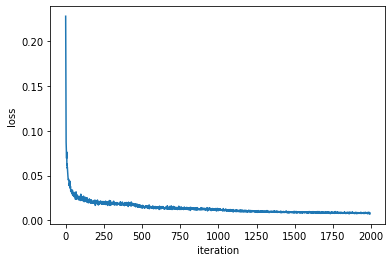

In [20]:
x = np.linspace(1,len(LOSS),len(LOSS))
y = np.array(LOSS)
plt.plot(x,y)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

In [35]:
train_labels.shape

torch.Size([2000])

In [36]:
x_train,_ = model(train_features)
x_train = x_train.view(-1,6)
x_train = x_train.detach().numpy()

In [37]:
y_train = train_labels.detach().numpy()
y_train = y_train.reshape(len(y_train),)
print(y_train.shape)

(2000,)


In [38]:
x_test,_ = model(test_features)
x_test = x_test.view(-1,6)
x_test = x_test.detach().numpy()

In [39]:
y_test = test_labels.detach().numpy()
y_test = y_test.reshape(len(y_test),)
print(y_test.shape)

(276,)


In [42]:
train_df = pd.DataFrame(x_train,columns = ["f1","f2","f3","f4","f5","f6"])

In [43]:
train_df["label"] = y_train

In [44]:
train_df

,f1,f2,f3,f4,f5,f6,label
0,0.049793,0.898055,-0.409099,0.075851,-0.738460,-0.521373,0
1,-0.105515,0.757293,-0.506611,-0.522477,-0.668335,-0.700161,1
2,-0.035078,0.105294,0.359197,-0.673533,-0.696296,-0.799454,0
3,-0.872810,0.290386,0.537954,-0.175134,-0.290019,-0.956010,0
4,-0.928975,0.712894,0.818719,-0.616418,-0.516517,-0.832278,1
...,...,...,...,...,...,...,...
1995,-0.258112,0.342796,0.208885,0.089367,-0.561022,-0.038190,1
1996,-0.154862,0.482284,0.194690,0.011129,-0.491039,-0.029575,1
1997,-0.198089,0.260621,0.124842,-0.013335,-0.461794,-0.143586,1
1998,-0.117219,0.328620,0.227355,0.018442,-0.407998,-0.186344,1


In [45]:
test_df = pd.DataFrame(x_test,columns = ["f1","f2","f3","f4","f5","f6"])
test_df["label"] = y_test

In [46]:
test_df

,f1,f2,f3,f4,f5,f6,label
0,-0.585452,0.537005,0.889799,-0.108686,-0.637157,-0.161149,0
1,-0.471562,0.359512,0.275298,-0.381588,-0.860028,0.363237,1
2,-0.321655,0.436228,0.123557,-0.312269,-0.460502,-0.176002,0
3,-0.487490,0.300810,0.496499,0.005580,-0.365455,-0.231464,1
4,-0.361425,0.506481,0.370880,-0.208517,-0.538276,0.115013,1
...,...,...,...,...,...,...,...
271,-0.200019,0.308827,0.035897,0.102653,-0.300474,-0.100670,1
272,-0.237955,0.445253,0.580180,-0.045984,-0.564651,0.284254,0
273,-0.086763,0.472739,0.059499,0.140871,-0.463131,0.242721,1
274,-0.249495,0.243281,0.210798,-0.093395,-0.358696,-0.029523,1


In [47]:
x_train = train_df[["f1","f2","f3","f4","f5","f6"]].values
y_train = train_df[["label"]].values

In [48]:
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train).view(-1)

In [49]:
x_test = test_df[["f1","f2","f3","f4","f5","f6"]].values
y_test = test_df[["label"]].values

In [50]:
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test).view(-1)

In [51]:
#hy parameter
torch.manual_seed(1)
EPOCH = 10000
BATCH_SIZE = 16
INPUT_SIZE = 6
LR = 0.001

In [52]:
#Mini-Batch
torch_dataset = Data.TensorDataset(x_train,y_train)
train_loader = Data.DataLoader(
    dataset = torch_dataset,
    batch_size = BATCH_SIZE,
    num_workers = 2,
    shuffle=True,
)

In [53]:
class ANN(torch.nn.Module):
    def __init__(self):
        super(ANN,self).__init__()
        self.hidden1 = torch.nn.Linear(6,32)
        self.hidden2 = torch.nn.Linear(32,16)
        self.hidden3 = torch.nn.Linear(16,3)
    def forward(self,x):
        h1_out = self.hidden1(x)
        h2_out = self.hidden2(h1_out)
        h3_out = self.hidden3(h2_out)
        return h3_out
    

In [54]:
ann = ANN()
print(ann)

ANN(
  (hidden1): Linear(in_features=6, out_features=32, bias=True)
  (hidden2): Linear(in_features=32, out_features=16, bias=True)
  (hidden3): Linear(in_features=16, out_features=3, bias=True)
)


In [55]:
# define optimizer and loss function 
optimizer = torch.optim.Adam(model.parameters(), lr=LR,weight_decay=0.0000)
# adject learning rate . when loss don't fall , lr = lr * factor  , min lr = 0.0001
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,factor = 0.9,min_lr=0.0001)
# crossentroy loss 
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
'''
Training 
'''
LOSS = []
for epoch in range(EPOCH):
    loss_total = 0
    for step,(inputs,targets) in enumerate(train_loader):
       
         # start trainnig 
        output = ann(inputs)
        
        # calculate loss  (cross entroy)
        loss = loss_func(output,targets)
        # clear the gradients of all optimized variables(from last training)
        optimizer.zero_grad()
        
        # back propagation
        loss.backward()
        optimizer.step()
        # sum of loss
        loss_total = loss_total + loss
        
        # print training info every 10 steps
        if((step+1) %10 == 0):
            # average of loss in 10 steps
            avg = loss_total / 10
            LOSS.append(avg.tolist())
            
            # print the epoch , steps , average loss , accuracy 
            print("Epoch: %4d|steps: %4d|Train Avg Loss: %.4f "%(epoch+1,step+1,avg))
            
            # inital variable
            loss_total = 0
    # updata learning rate
    #scheduler.step(loss)
        


Epoch:    1|steps:   10|Train Avg Loss: 1.1483 
Epoch:    1|steps:   20|Train Avg Loss: 1.1472 
Epoch:    1|steps:   30|Train Avg Loss: 1.1525 
Epoch:    1|steps:   40|Train Avg Loss: 1.1497 
Epoch:    1|steps:   50|Train Avg Loss: 1.1522 
Epoch:    1|steps:   60|Train Avg Loss: 1.1439 
Epoch:    1|steps:   70|Train Avg Loss: 1.1462 
Epoch:    1|steps:   80|Train Avg Loss: 1.1501 
Epoch:    1|steps:   90|Train Avg Loss: 1.1422 
Epoch:    1|steps:  100|Train Avg Loss: 1.1453 
Epoch:    1|steps:  110|Train Avg Loss: 1.1452 
Epoch:    1|steps:  120|Train Avg Loss: 1.1445 
Epoch:    2|steps:   10|Train Avg Loss: 1.1510 
Epoch:    2|steps:   20|Train Avg Loss: 1.1487 
Epoch:    2|steps:   30|Train Avg Loss: 1.1465 
Epoch:    2|steps:   40|Train Avg Loss: 1.1447 
Epoch:    2|steps:   50|Train Avg Loss: 1.1492 
Epoch:    2|steps:   60|Train Avg Loss: 1.1450 
Epoch:    2|steps:   70|Train Avg Loss: 1.1480 
Epoch:    2|steps:   80|Train Avg Loss: 1.1465 
Epoch:    2|steps:   90|Train Avg Loss: 

Epoch:   15|steps:   50|Train Avg Loss: 1.1478 
Epoch:   15|steps:   60|Train Avg Loss: 1.1461 
Epoch:   15|steps:   70|Train Avg Loss: 1.1461 
Epoch:   15|steps:   80|Train Avg Loss: 1.1461 
Epoch:   15|steps:   90|Train Avg Loss: 1.1493 
Epoch:   15|steps:  100|Train Avg Loss: 1.1478 
Epoch:   15|steps:  110|Train Avg Loss: 1.1464 
Epoch:   15|steps:  120|Train Avg Loss: 1.1447 
Epoch:   16|steps:   10|Train Avg Loss: 1.1486 
Epoch:   16|steps:   20|Train Avg Loss: 1.1454 
Epoch:   16|steps:   30|Train Avg Loss: 1.1487 
Epoch:   16|steps:   40|Train Avg Loss: 1.1479 
Epoch:   16|steps:   50|Train Avg Loss: 1.1427 
Epoch:   16|steps:   60|Train Avg Loss: 1.1481 
Epoch:   16|steps:   70|Train Avg Loss: 1.1452 
Epoch:   16|steps:   80|Train Avg Loss: 1.1471 
Epoch:   16|steps:   90|Train Avg Loss: 1.1449 
Epoch:   16|steps:  100|Train Avg Loss: 1.1477 
Epoch:   16|steps:  110|Train Avg Loss: 1.1509 
Epoch:   16|steps:  120|Train Avg Loss: 1.1459 
Epoch:   17|steps:   10|Train Avg Loss: 

Epoch:   29|steps:   90|Train Avg Loss: 1.1452 
Epoch:   29|steps:  100|Train Avg Loss: 1.1449 
Epoch:   29|steps:  110|Train Avg Loss: 1.1450 
Epoch:   29|steps:  120|Train Avg Loss: 1.1512 
Epoch:   30|steps:   10|Train Avg Loss: 1.1465 
Epoch:   30|steps:   20|Train Avg Loss: 1.1498 
Epoch:   30|steps:   30|Train Avg Loss: 1.1471 
Epoch:   30|steps:   40|Train Avg Loss: 1.1446 
Epoch:   30|steps:   50|Train Avg Loss: 1.1490 
Epoch:   30|steps:   60|Train Avg Loss: 1.1486 
Epoch:   30|steps:   70|Train Avg Loss: 1.1467 
Epoch:   30|steps:   80|Train Avg Loss: 1.1504 
Epoch:   30|steps:   90|Train Avg Loss: 1.1514 
Epoch:   30|steps:  100|Train Avg Loss: 1.1442 
Epoch:   30|steps:  110|Train Avg Loss: 1.1426 
Epoch:   30|steps:  120|Train Avg Loss: 1.1446 
Epoch:   31|steps:   10|Train Avg Loss: 1.1497 
Epoch:   31|steps:   20|Train Avg Loss: 1.1407 
Epoch:   31|steps:   30|Train Avg Loss: 1.1479 
Epoch:   31|steps:   40|Train Avg Loss: 1.1478 
Epoch:   31|steps:   50|Train Avg Loss: 

In [ ]:
targets.shape

In [ ]:
output.shape